# <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a> pour Statistique et Science des Données

# Génération de graphiques avec `plotly`

Dernier élément de notre trousse à outil pour l'exploration de données, la bibliothèque `plotly` va nous permettre de **générer une grande variété de graphes** avec un **rendu visuel agréable** et facilement personnalisable.

Les graphes générés par `plotly` sont avant tout conçus pour des supports numériques et sont donc **interactifs** (à la manière d'un `d3.js`, sans la complexité). Vous pourrez donc manipuler votre graphe rapidement une fois généré.

Il reste toutefois **possible d'exporter un graphique vers un format statique** plus conventionnel (PNG ou JPEG pour des formats matriciels, PDF ou SVG pour des formats vectoriels adaptés à l'impression).

`plotly` possède **deux contextes d'utilisation** (deux API) distincts.
* Une première API impérative complète où il est nécessaire de détailler chaque élément du graphe. Cette API vous permettra de générer l'ensemble des [graphes supportés](https://plot.ly/python/) (plus de 40 types).
* Une seconde API déclarative (dite **`plotly express`**) permettant de générer seulement une partie des types de graphes supportés (les plus courants uniquement) mais beaucoup plus succinctement.

Les deux API seront vues dans cette introduction, en commençant par la première API, plus complexe mais également plus complète.

Indépendamment de l'API utilisée, il est possible de personnaliser la figure selon ses besoins. Les styles par défaut ont néanmoins le bon goût d'être lisibles et bien conçus.


Enfin, pour les allergiques au code, l'équipe derrière `plotly` a développé une version en ligne de la librairie ([Chart maker](https://chart-studio.plot.ly/create/#/)) offrant les mêmes fonctionnalités mais via une interface graphique. Il existe possiblement des limitations d'utilisation, l'offre étant normalement payante. Cette interface ne sera pas utilisée en TD.

----

## Installer Plotly


Installer plotly avec conda, ouvrez un terminal et tapez:

```sh
conda install -c plotly plotly=5.6.0
```

Permettre le support de JupyterLab et Jupyter Notebook, ouvrez un terminal et tapez:

```sh
# Normalement les dépendances ci-dessous sont déjà installées
conda install "jupyterlab>=3" "ipywidgets>=7.6"
```

Redémarrer Anaconda (sinon, il se peut que les figures ne s'affiche pas)


### Export d'images statiques

#### Kaleido

Afin de pouvoir exporter des images de nos graphiques (en png, svg, pdf, etc...), installer Kaleido:

```sh
conda install -c plotly python-kaleido
```



### Différence entre la version 4 et la version 5 de Plotly

Dans la version 4, toutes les fonctionnalités "en ligne" ont été supprimées du package plotly et sont désormais disponibles en tant que package chart-studio séparé et facultatif (voir ci-dessous). plotly.py version 4 est "hors ligne" uniquement et n'inclut aucune fonctionnalité permettant de télécharger des chiffres ou des données vers des services cloud.

In [1]:
# Lancer le code ci-dessous pour vérifier l'installation
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.write_html('first_figure.html', auto_open=True)


## 1. Première prise en main

Un graphique dans plotly est une *figure*. 

**Chaque figure est un conteneur** regroupant divers éléments (dit *graph objects*) qui, mis bout à bout, permettent de générer l'aperçu visuel final.

Ces élements sont les suivants :
* Une mise en page (un *layout*) définissant l'aspect visuel de la figure, le positionnement des graphes, la légende, etc...
* Au moins un graphe (une *trace*). Une figure peut contenir plusieurs graphes qui seront alors superposés ou juxtaposés (selon les options choisies). Chaque graphe a un type unique qui l'identifie parmi les 40+ types supportés par `plotly`.

Pour créer une figure dans `plotly`, il est nécessaire de **définir au minimum une trace**. Dans ce cas, `plotly` se charge de créer un **layout adapté par défaut**.

Toutes les fonctions et classes nécessaires pour créer des traces sont dans le package `plotly.graph_objects`. 

Chaque trace (type de graphique) a évidemment ses **spécificités**, il est donc impossible d'en faire le tour au cours de cette introduction. Nous nous contenterons de voir les **types les plus classiques**, la [**documentation**](https://plot.ly/python/), assez qualitative et bien illustrée, vous permettra de découvrir et d'utiliser les graphes plus avancés.



Petit exemple motivant :

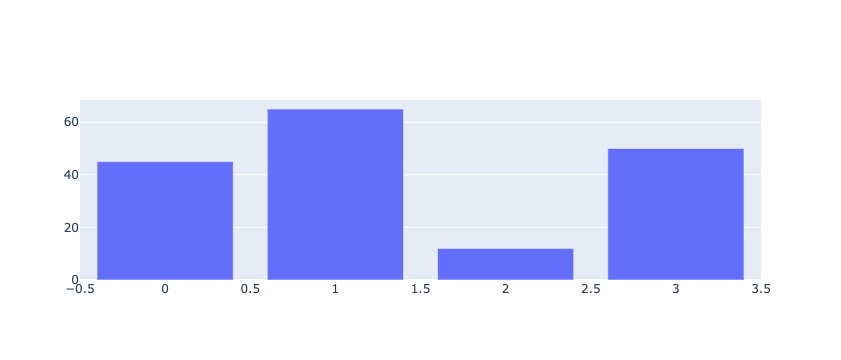

In [22]:
import plotly.graph_objects as go

random_data = [45, 65, 12, 50]

my_first_graph = go.Figure(
    data=[go.Bar(y=random_data)]
)

my_first_graph.show()

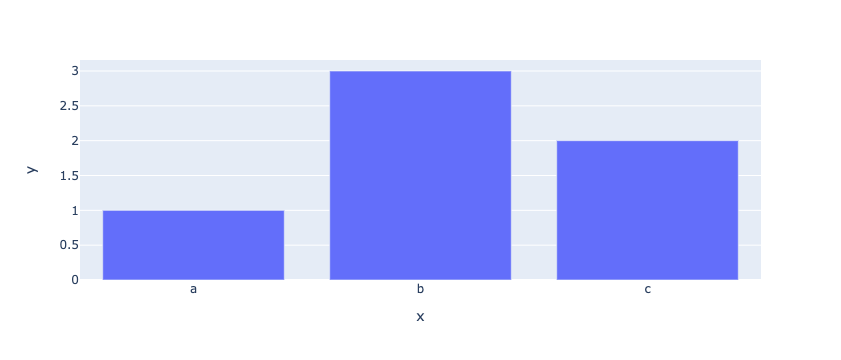

In [3]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

Ce premier exemple permet déjà d'apprécier le rendu visuel par défaut ainsi que l'interactivité du graphe.

L'objet `my_first_graph` (de type `Figure`) contient l'ensemble des informations nécessaires à la création du graphe. Le paramètre **`data`** reçoit notamment la **liste des traces à afficher** dans le graphe. Dans notre cas, il s'agit uniquement d'une trace de type diagramme en barres. On constate également qu'en l'absence de données en abscisse, `plotly` a recréé un axe par défaut (numéroté de 0 à 3).

On peut choisir d'afficher dans le notebook l'objet `my_first_graph` avec la fonction **`show`** (montrée ci-dessus). Pour exporter le graphe vers un format statique, il existe les fonctions **`write_html`** et **`write_image`**.

* `write_html` crée un fichier HTML statique contenant le graphe et les données nécessaires. N'importe qui possédant ce fichier HTML peut l'ouvrir dans un navigateur pour afficher le graphe.
* `write_image` crée une image avec le format souhaité

In [ ]:
my_first_graph.write_image('my_first_graph.pdf') # Enregistrement vers un format PDF

# my_first_graph.write_image('my_first_graph.png') # Enregistrement vers un format PNG
# etc... Le format final dépend uniquement de l'extension indiquée

Essayons désormais de combiner deux types de traces sur le même graphe, dans notre cas 
* Un diagramme en barres
* Une courbe (dans `plotly`, il s'agit d'un nuage de points (*scatter plot*) ou les points sont connectés et masqués)

Afin de se repérer entre les deux traces, nous leur donnerons également une légende. Dans `plotly`, la légende de chaque trace correspond à l'attribut `name`.

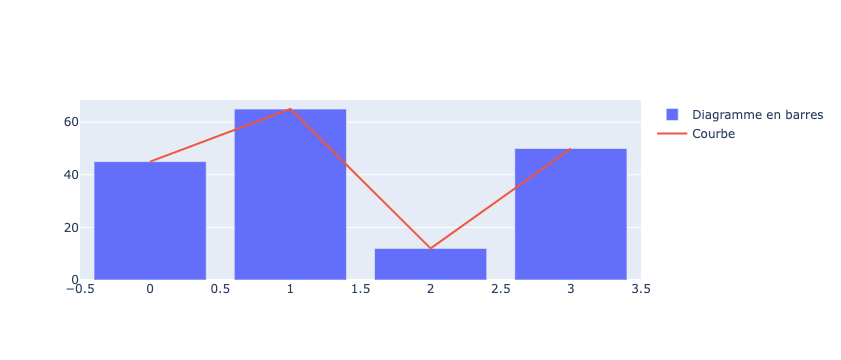

In [ ]:
combined_graph = go.Figure(
    data=[go.Bar(y=random_data, name='Diagramme en barres'),
          go.Scatter(y=random_data, mode='lines', name='Courbe')]
)

combined_graph.show()

Nous pouvons sinon tracer chaque graphe dans son propre espace (*subplot*).

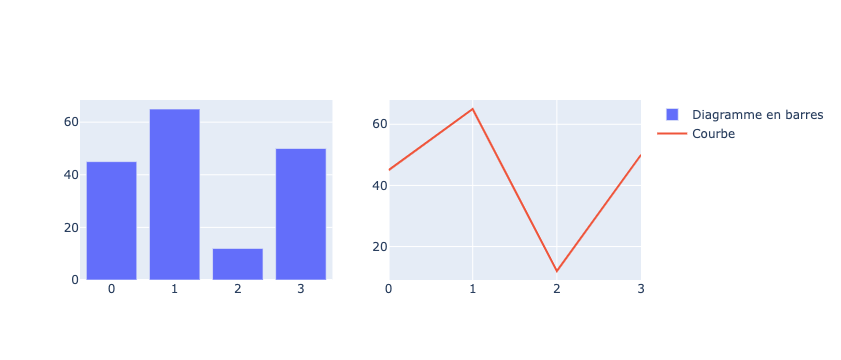

In [ ]:
from plotly.subplots import make_subplots

subplots = make_subplots(cols=2, rows=1)
subplots.add_trace(go.Bar(y=random_data, name='Diagramme en barres'), 
                   col=1, row=1) # Graphe (1,1) → à gauche

subplots.add_trace(go.Scatter(y=random_data, name='Courbe', mode='lines'), 
                   col=2, row=1) # Graphe (2, 1) → à droite

----

## 2. Personnalisation du graphique

Chaque composant d'une figure peut être personnalisé indépendamment des autres. 

Les options de personnalisation peuvent être définies lors de la création de la figure et des traces ou bien a posteriori, en mettant à jour l'objet `Figure`. Pour ce faire deux fonctions liées à l'objet de type `Figure` sont disponibles :
* `update_layout` pour modifier des options propres au layout
* `update_traces` pour modifier des options propres aux différentes traces

L'ensemble des options de configuration est disponible dans [ce référentiel](https://plot.ly/python/reference/) à conserver à proximité lors de la création de graphe avec `plotly`.

### Modification du `layout`

On remarque notamment dans ce référentiel que les options sont imbriquées les unes dans les autres. Ainsi, dans la partie `Layout`, la hiérarchie suivante existe pour les options sur le titre du graphe `title` :
* `title`
    * `text`
    * `font`
        * `family`
        * `size`
        * `color`
    * `yref`
    * `xref`
    * `x`
    * `y`
    * `xanchor`
    * `yanchor`
    * `pad`
        * `t`
        * `b`
        * `l`
        
Nous allons voir les deux possibilités pour personnaliser le titre de notre graphe combiné ci-dessus.

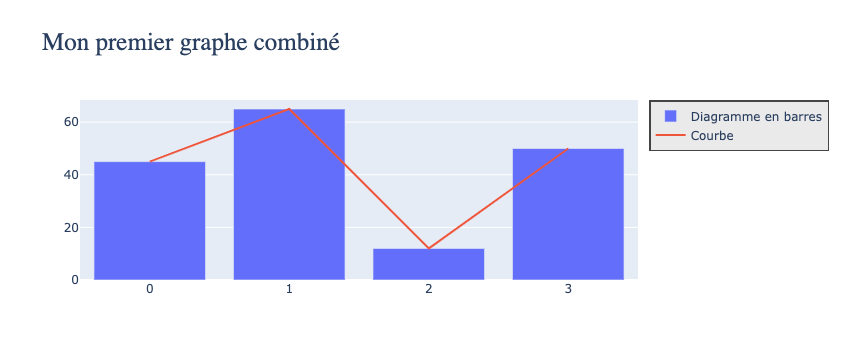

In [ ]:
# Méthode 1 : passer un dictionnaire reproduisant l'imbrication présentée dans le référentiel
# Il n'est pas nécessaire de préciser toutes les options, seulement celles que l'on souhaite changer

combined_graph.update_layout(
    {'title': {'text': 'Mon premier graphe combiné',
               'font': {
                   'size': 25,
                   'family': 'Segoe UI Light'
                    }
               },
     'legend': {'bgcolor': '#eaeaea',
                'borderwidth': 1.5}
    }
)

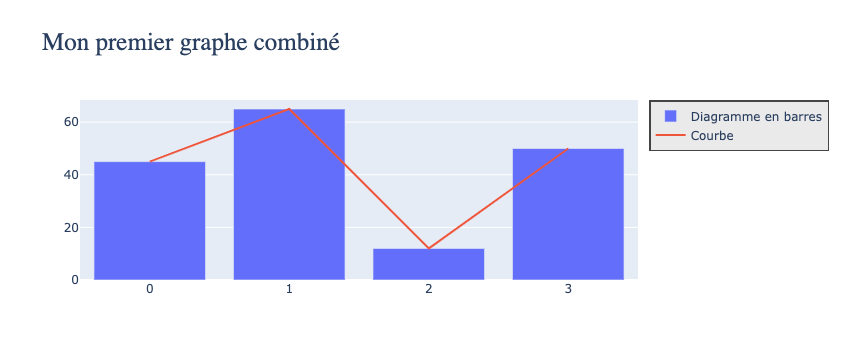

In [ ]:
# Méthode 2 (magic underscores): pour chaque propriété à modifier, préciser le "chemin" complet en 
# plaçant un underscore "_" entre chaque niveau
# On applique les mêmes personnalisations que précédemment

# Recréation du graphe non-personnalisé
combined_graph = go.Figure(
    data=[go.Bar(y=random_data, name='Diagramme en barres'),
          go.Scatter(y=random_data, mode='lines', name='Courbe')]
)

combined_graph.update_layout(title_text = 'Mon premier graphe combiné',
                             title_font_size = 25,
                             title_font_family = 'Segoe UI Light',
                             legend_bgcolor = '#eaeaea',
                             legend_borderwidth = 1.5)

**Les deux méthodes sont exactement équivalentes.**

La première méthode est efficace lorsque l'on souhaite modifier de nombreuses propriétés similaires (e.g. personnaliser en profondeur l'apparence du titre). La seconde méthode est quant à elle plus concise et claire quand on souhaite ne modifier que quelques propriétés.

Enfin, il est également possible de **configurer le `layout` directement lors de la création de la figure** (et non a posteriori comme vu ci-dessus). Pour ce faire, il suffit de **passer un objet `Layout` lors de l'instanciation** de la figure. Cet objet peut recevoir les **mêmes propriétés que précédemment**, et les deux modes de configuration (par dictionnaire, ou par "magic underscore").

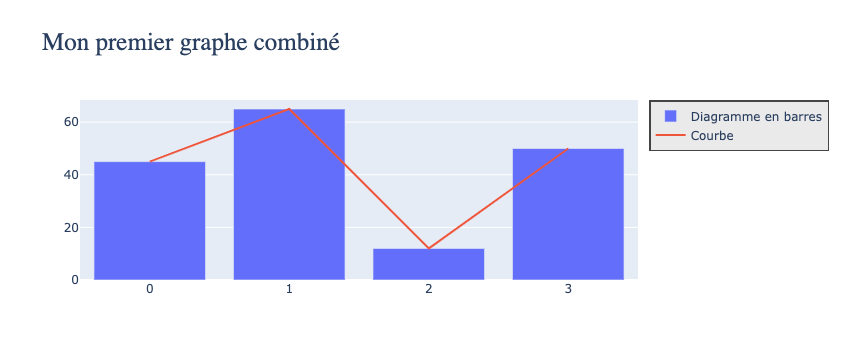

In [ ]:
combined_graph = go.Figure(
    data=[go.Bar(y=random_data, name='Diagramme en barres'),
          go.Scatter(y=random_data, mode='lines', name='Courbe')],
    # On rajoute la configuration du layout lors de la création du graphe
    layout=go.Layout(title_text = 'Mon premier graphe combiné',
                     title_font_size = 25,
                     title_font_family = 'Segoe UI Light',
                     legend_bgcolor = '#eaeaea',
                     legend_borderwidth = 1.5)
)

combined_graph.show()

### Modification des `traces`

De la même manière, nous pouvons chercher dans le référentiel les options de configurations pour chaque trace.

Appliquons quelques modifications sur les traces à l'aide de la méthode "magic underscore" (méthode 2 ci-dessus).

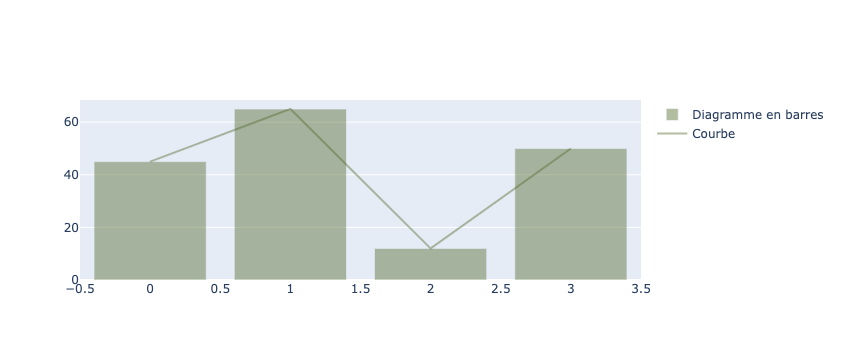

In [ ]:
# Recréation du graphe non-personnalisé
combined_graph = go.Figure(
    data=[go.Bar(y=random_data, name='Diagramme en barres'),
          go.Scatter(y=random_data, mode='lines', name='Courbe')]
)

combined_graph.update_traces(opacity=0.45, marker_color='darkolivegreen')

La méthode **`update_traces` s'appliquent uniformément sur toutes les traces** contenues dans une `Figure` (sous réserve que l'option précisée existe pour toute les traces).

Afin de cibler plus précisément les traces que l'on souhaite personnaliser, la méthode `update_traces` possède un attribut **`selector`** pouvant recevoir un filtre. Toutes les traces de la figure répondant à ce filtre seront mises à jour, les autres seront conservées telles quelles.

Un filtre est simplement un dictionnaire contenant des propriétés avec la même imbrication que dans le référentiel. Toutes les traces possédant les mêmes propriétés seront sélectionnés. Dans la plupart des cas, on cherchera simplement à sélectionner un type de graphique de particulier, nous abordons ce cas ci-dessous.

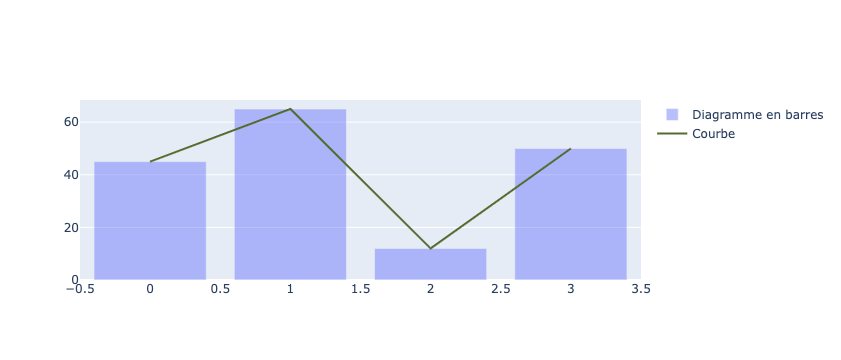

In [23]:
# Recréation du graphe non-personnalisé
combined_graph = go.Figure(
    data=[go.Bar(y=random_data, name='Diagramme en barres'),
          go.Scatter(y=random_data, mode='lines', name='Courbe')]
)

# On souhaite baisser l'opacité du diagramme en barres
combined_graph.update_traces(opacity=0.45, selector={'type': 'bar'})
# ... et changer la couleur de la courbe uniquement
combined_graph.update_traces(marker_color='darkolivegreen', selector={'type': 'scatter'})

Enfin terminons cette première découverte de la personnalisation des figures dans `plotly` en remarquant que toutes les options passées à `update_traces` peuvent simplement être indiquées lors de la création des traces directement.

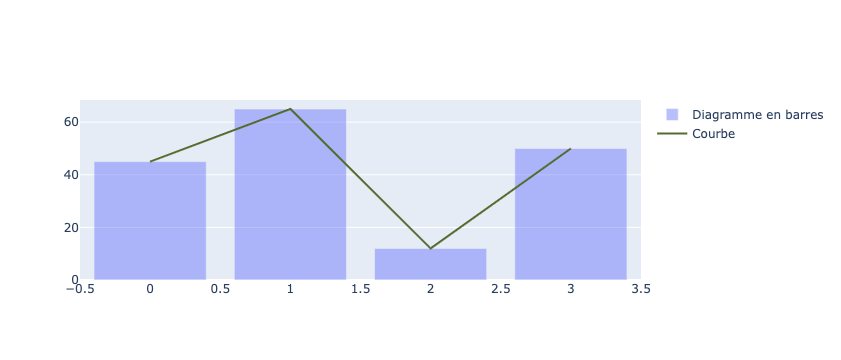

In [ ]:
prestyled_graph = go.Figure(
    data=[go.Bar(y=random_data, name='Diagramme en barres', opacity=0.45),
          go.Scatter(y=random_data, mode='lines', name='Courbe', marker_color='darkolivegreen')]
)

prestyled_graph.show()

## 3. Chargement d'un jeu de données

Pour simplifier nos expérimentations avec `plotly`, nous chargeons un **jeu déjà nettoyé** et prêt à l'emploi pour l'instant. Au cours des TD suivants, nous connecterons toutes les connaissances vues à présents pour suivre l'ensemble du processus d'analyse (processus KDD).

Divers jeux de données nettoyés sont disponibles directement dans `plotly` en guise d'exemple. Nous travaillerons avec `gapminder` où sont indiqués différents indices de développement des pays à travers le monde.

In [24]:
import plotly.data

data = plotly.data.gapminder()
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


Ce jeu de données contient :
* 5 variables qualitatives (dont 2 numériques : `year` et `iso_num`)
* 3 variable quantitatives

Commençons par explorer les différentes distributions des variables quantitatives.

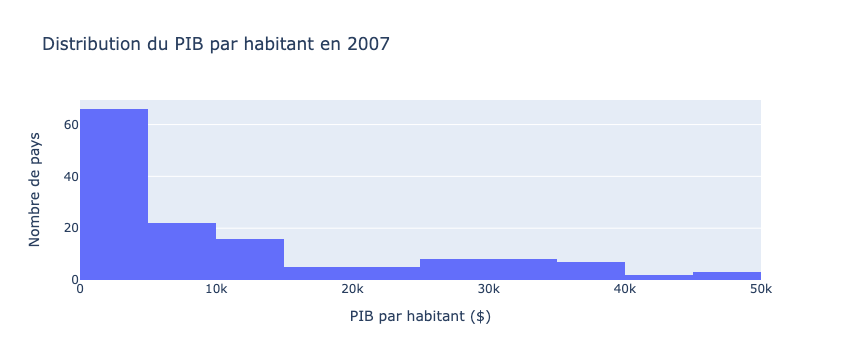

In [25]:
data_2007 = data[data.year == 2007]

gdp_distrib_2007 = go.Figure(
    data=go.Histogram(x=data_2007.gdpPercap, nbinsx=20),
    layout=go.Layout(title='Distribution du PIB par habitant en 2007',
                     xaxis_title='PIB par habitant ($)',
                     yaxis_title='Nombre de pays')
)

gdp_distrib_2007.show()

Les traces étant définies au sein d'une liste passée au paramètre `data`, nous pouvons tirer parti de la fonctionnalité de compréhension de liste de Python pour générer rapidement autant de trace que de modalités d'une variable (ici `continent`).

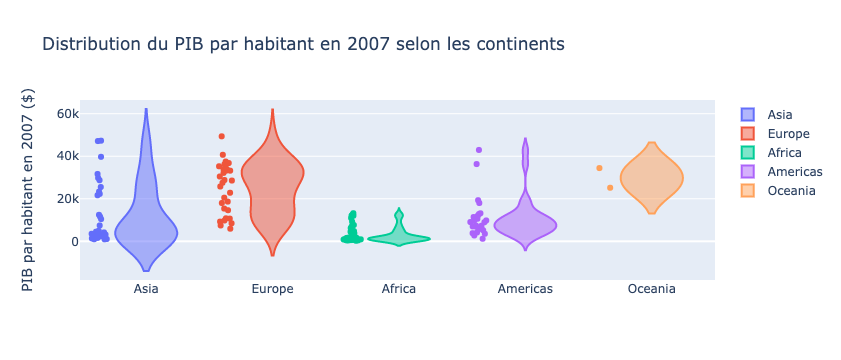

In [27]:
gdp_boxplot_2007 = go.Figure(
    data=[go.Violin(y=data_2007[data_2007.continent == continent].gdpPercap,
                 name=continent, # On place le nom du continent en légende
                 points='all'  # On affiche également tous les points pour chaque modalité
                   ) for continent in data_2007.continent.unique()],
    layout=go.Layout(title_text='Distribution du PIB par habitant en 2007 selon les continents',
                    yaxis_title='PIB par habitant en 2007 ($)')
)


gdp_boxplot_2007.show()

On remarque que dans ce cas `plotly` calcule pour nous les quartiles et les indique dans l'infobulle pour chaque série de données.

Intéressons nous désormais au lien entre espérance de vie moyenne et PIB par habitant selon les continents (toujours en 2007).

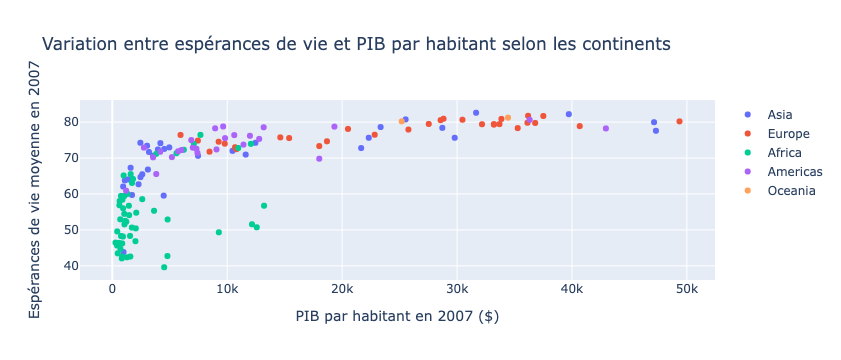

In [ ]:
life_exp_vs_gdp_2007 = go.Figure(
    data = [go.Scatter(x=data_2007[data_2007.continent == continent].sort_values(by='lifeExp').gdpPercap,
                       y=data_2007[data_2007.continent == continent].sort_values(by='lifeExp').lifeExp,
                       hovertext=data_2007[data_2007.continent == continent].sort_values(by='lifeExp').country,
                       name=continent,
                       mode='markers')
            for continent in data_2007.continent.unique()
            ],
    
    layout = go.Layout(title='Variation entre espérances de vie et PIB par habitant selon les continents',
                       xaxis_title='PIB par habitant en 2007 ($)',
                       yaxis_title='Espérances de vie moyenne en 2007')
)

life_exp_vs_gdp_2007.show()

----

## 4. Plotly Express

Plotly Express est le nom donné à la deuxième API de la bibliothèque `plotly`. Il s'agit d'une **addition récente** (Mars 2019) qui offre la possibilité de créer très rapidement la plupart des graphes de base avec une **syntaxe déclarative**.

Outre cette facilité de création, l'intérêt de cette deuxième API réside dans sa **parfaite compatibilité avec les graphes créés par la première API** vue jusqu'à présent. Vous pourrez donc combiner des graphes créés par les deux API sans aucun souci.

De même, **Plotly Express renvoie un objet de type `Figure`** identique en tout point à ceux manipulés jusqu'à présent. Toutes les techniques de personnalisation abordées ci-dessus sont donc valides telles quelles.

En somme, Plotly Express facilite l'étape d'instanciation de la figure pour les graphes les plus courants et permet d'expérimenter différents types de graphes rapidement.

Seule limitation : Plotly Express fonctionne **uniquement avec des données dans le format dit `tidy`**. Autrement dit, les données utilisées doivent présenter les **variables en colonnes** et les **observations en ligne**. Nous verrons dans le prochain TD comment s'assurer avec `pandas` que ces données sont dans le bon format. Pour l'heure, travaillons avec le même jeu de données d'exemple qui est au bon format.

In [28]:
# Commençons par importer cette API pour commencer
import plotly.express as px

Les types de graphes (traces) supportés sont les suivants :
* scatter
* scatter_3d
* scatter_polar
* scatter_ternary
* scatter_mapbox
* scatter_geo
* line
* line_3d
* line_polar
* line_ternary
* line_mapbox
* line_geo
* area
* bar
* bar_polar
* violin
* box
* strip
* histogram
* pie
* treemap
* sunburst
* funnel
* funnel_area
* scatter_matrix
* parallel_coordinates
* parallel_categories
* choropleth
* choropleth_mapbox
* density_contour
* density_heatmap
* density_mapbox
* imshow

On retrouve comme prévu la plupart des types de graphes courants (`scatter`, `line`, `box`, `area`, `choropleth`).

Plotly Express est intimement lié à la structure du DataFrame de `pandas`. Chacune des fonctions ci-dessus accepte comme **premier argument un DataFrame** avec des variables en colonne et des observations en ligne. Ensuite, il vous suffit d'indiquer pour chaque caractéristique du graphe le nom de la colonne dont vous souhaitez utiliser les données. Plotly Express se charge alors de faire le lien entre les données dans le colonne et les opérations nécessaires pour construire le graphe.

Un exemple s'impose, reconstruisons un des graphes créés ci-dessus sur le jeu de données GapMinder.

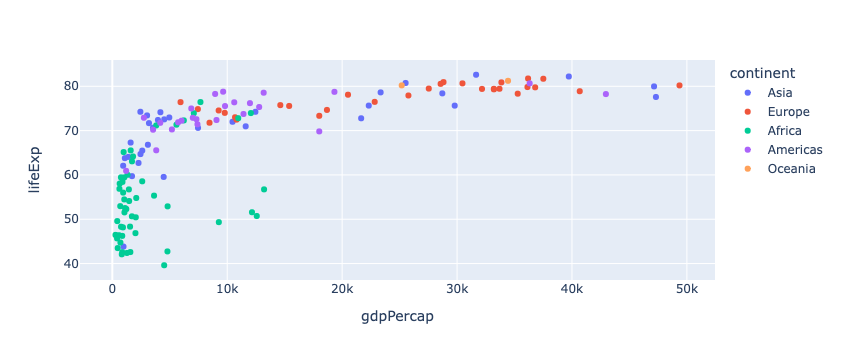

In [29]:
# Pour rappel, le code nécessaire pour tracer la figure avec l'API impérative

# life_exp_vs_gdp_2007 = go.Figure(
#     data = [go.Scatter(x=data_2007[data_2007.continent == continent].sort_values(by='lifeExp').gdpPercap,
#                        y=data_2007[data_2007.continent == continent].sort_values(by='lifeExp').lifeExp,
#                        hovertext=data_2007[data_2007.continent == continent].sort_values(by='lifeExp').country,
#                        name=continent,
#                        mode='markers')
#             for continent in data_2007.continent.unique()
#             ],
    
#     layout = go.Layout(title='Variation entre espérances de vie et PIB par habitant selon les continents',
#                        xaxis_title='PIB par habitant en 2007 ($)',
#                        yaxis_title='Espérances de vie moyenne en 2007')
# )

# life_exp_vs_gdp_2007.show()

# ===========
# Et maintenant avec Plotly Express

px_life_exp_vs_gdp_2007 = px.scatter(data_2007, # On passe le DF en premier lieu
                                     y='lifeExp', # On souhaite avoir l'espérance de vie moyenne en ordonnée
                                     x='gdpPercap', # Et le PIB par habitant en abscisse
                                     color='continent', # On colorie chaque point selon le continent du pays
                                     hover_name='country') # Nom du pays dans l'infobulle de chaque point

px_life_exp_vs_gdp_2007.show()

Le graphe a été reproduit presqu'à l'identique en quelques lignes seulement.

On retrouve bien le paradigme déclaratif de cette API : nous avons indiqué uniquement ce qui nous souhaitions obtenir (valeurs de `lifeExp` en ordonnées, couleur liée au `continent`, etc...) et Plotly s'est chargé du reste.

Remarquons que l'objet retourné par Plotly Express est une `Figure`, nous pouvons donc terminer de personnaliser le graphe comme nous le désirons.

In [30]:
type(px_life_exp_vs_gdp_2007)

plotly.graph_objs._figure.Figure

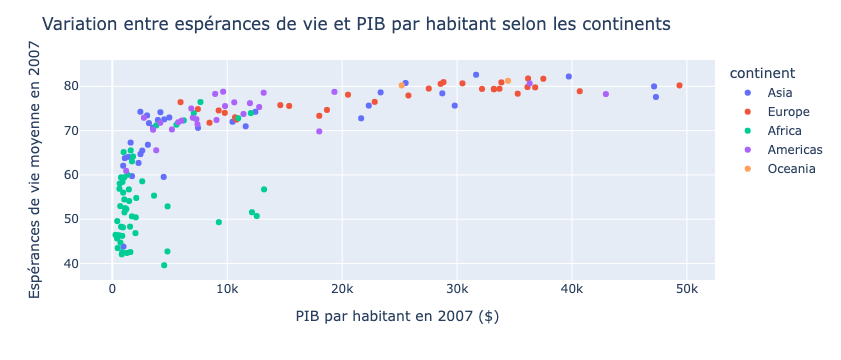

In [ ]:
px_life_exp_vs_gdp_2007.update_layout(title='Variation entre espérances de vie et PIB par habitant selon les continents',
                                      xaxis_title='PIB par habitant en 2007 ($)',
                                      yaxis_title='Espérances de vie moyenne en 2007')

px_life_exp_vs_gdp_2007.show()

Plotly Express excelle surtout lorsqu'il s'agit de crée des **graphes complexes** dont les caractéristiques d'apparences dépendent de nombreuses colonnes.

Considérons le graphe (animé !) ci-dessous et la simplicité de sa création pour s'en convaincre.

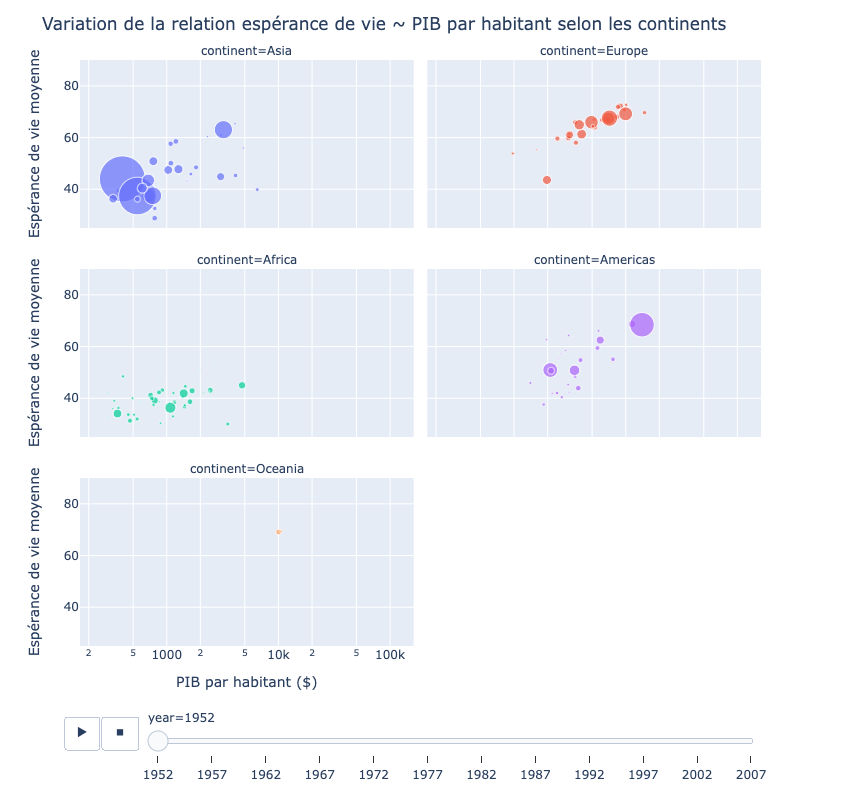

In [31]:
complex_gapminder = px.scatter(data,
                               # Définition des axes
                               x='gdpPercap',
                               y='lifeExp',
                               # Taille de chaque point dynamique selon la population du pays (avec une taille max)
                               size='pop',
                               size_max=50,
                               # On dissocie chaque continent par une couleur propre et on isole les graphes
                               color='continent',
                               facet_col='continent',
                               facet_col_wrap=2, # 2 subplot par lignes au maximum
                               height=800, # On augmente la hauteur de la figure pour davantage de visibilité
                               animation_frame='year', # Une image par année distincte dans le jeu de donnée
                               hover_name='country', # On ajoute le nom du pays dans l'infobulle
                               log_x=True, # Echelle log en x pour rester lisible entre les pays riches et pauvres
                               range_y=[25, 90], # Echelle manuelle en y pour représenter toute la plage couverte
                               labels = {'lifeExp': 'Espérance de vie moyenne',
                                         'gdpPercap': 'PIB par habitant ($)'}) 

complex_gapminder.update_layout(showlegend=False,  # La légende est inutile
                                title = 'Variation de la relation espérance de vie ~ PIB par habitant selon les continents')

dir(complex_gapminder)
complex_gapminder.show()

----

## Conclusion
Nous nous arrêterons ici pour la découverte de cette seconde API et de Plotly en général.

Dans les TD à suivre, nous mêlerons **toutes les bibliothèques vues jusqu'à présent** afin de retracer le processus KDD sur des jeux de données réels.

N'hésitez pas à vous entraîner pour **être à l'aise avec les fonctions principales des bibliothèques** en attendant. Il est bien entendu illusoire d'espérer maîtriser complètement `pandas`, `numpy` ou `plotly` compte tenu du nombre élevé de fonctionnalités offertes, mais la connaissances des fonctions de base vous permettra de **passer plus de temps sur l'analyse** en elle-même et **moins sur le code**. Dans tous les cas, les **documentations** vous permettront de vous rafraîchir la mémoire.